In [1]:
import numpy as np

# import keras libraries
import keras
from keras.models import load_model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



First X in the training data:


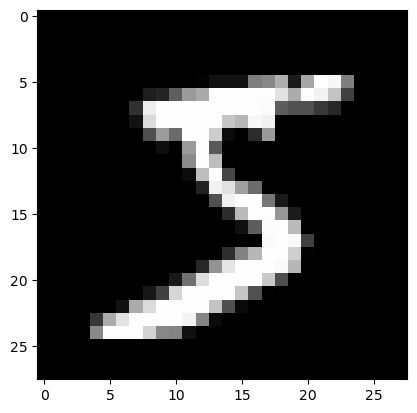

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [2]:
# import the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# print the first X and y values
print("First X in the training data:")
plt.imshow(X_train[0], cmap='gray')   # cmap Colour Map
plt.show()
print(X_train[0])
print("\nFirst y in the training data: " + str(y_train[0]))


In [5]:

a= 1*1.0
print(a)

1.0


In [3]:
print('\nThe X_training samples have a data type of', X_train.dtype)
print('The y_training samples have a data type of', y_train.dtype)


The X_training samples have a data type of uint8
The y_training samples have a data type of uint8


In [7]:
# convert x values to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

print('\nThe X_training samples have a data type of', X_train.dtype)
print('The X_test samples have a data type of', X_test.dtype)
print('\nThe y_training samples have a data type of', y_train.dtype)
print('The y_test samples have a data type of', y_test.dtype)


The X_training samples have a data type of float32
The X_test samples have a data type of float32

The y_training samples have a data type of float32
The y_test samples have a data type of float32


In [8]:
print("The mean pixel value of the first image in the X_training before scaling is ", np.mean(X_train[0]))

# scale pixel values from 0 to 1
X_train /= 255
X_test /= 255

print("The mean pixel value of the first image in the X_training after scaling is ", np.mean(X_train[0]))
print(X_train[0])

The mean pixel value of the first image in the X_training before scaling is  35.108418
The mean pixel value of the first image in the X_training after scaling is  0.13768007
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        

In [9]:
print("\nFirst y value in the training data is " + str(y_train[0]))


First y value in the training data is 5.0


In [8]:
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("\nFirst y value in the training data is " + str(y_train[0]))


First y value in the training data is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
print(X_train.shape)
# get number of columns in sample data
ncols = X_train.shape[1]



(60000, 28, 28)


In [11]:
from keras.models import Sequential 
from keras.layers import Flatten, Dense 
model = Sequential() #Defines the neural network architecture
model.add( Flatten(input_shape = (28,28) )) 
model.add(Dense(512, activation = 'relu')) 
model.add(Dense(32, activation = 'relu')) 
model.add(Dense(10, activation = 'softmax')) 
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 32)                16416     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# print the attributes of the model to ensure they're correct
print("Loss function: " + model.loss)
print("Optimizer: " + str(model.optimizer))
print("Metrics: " + str(model.metrics))

Loss function: categorical_crossentropy
Optimizer: <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x0000025800F98B20>
Metrics: []


In [13]:
# choose the batch size
batch_size = 128

# fit the model 
fit1 = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.2687 - accuracy: 0.9210 - val_loss: 0.1342 - val_accuracy: 0.9599
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0998 - accuracy: 0.9695 - val_loss: 0.0810 - val_accuracy: 0.9764
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0670 - accuracy: 0.9796 - val_loss: 0.0821 - val_accuracy: 0.9732
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.0731 - val_accuracy: 0.9779
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.0683 - val_accuracy: 0.9801


In [15]:
# evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)

# print model loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9801
Test loss: 0.06825052201747894
Test accuracy: 0.9800999760627747


In [17]:
# save model to model.h5
model.save('MNIST_MLPmodel.h5')

# load model
my_model = load_model('MNIST_MLPmodel.h5')

In [28]:
# initalize sequentital model
model2 = Sequential()

# buld the model with 3 dense layers and 2 dropout layers

# Input layer has ncols (784) neurons, and uses relu to output to 512 neurons
model2.add(Dense(512, activation='relu', input_shape=(ncols,)))

# randomly drop 20% of the neurons
model2.add(Dropout(0.2))

# 512 neruon layer, taken from the previous 512 minus the 20% dropped
model2.add(Dense(512, activation='relu'))

# randomly drop 20% of the neurons
model2.add(Dropout(0.2))

# output layer to 10 neruons with softmax activation
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()

# save model to model.h5
model2.save('model_2.h5')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [29]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print("Loss function: " + model2.loss)
print("Optimizer: " + str(model2.optimizer))
print("Metrics: " + str(model2.metrics))

Loss function: categorical_crossentropy
Optimizer: <keras.optimizers.optimizer_experimental.adam.Adam object at 0x00000228ECE59B80>
Metrics: []


In [34]:
# initialize early stopping monitor
early_stopping_monitor = EarlyStopping(patience=3)

In [35]:
batch_size = 128

# fit model with early stopping monitor
fit2 = model2.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=200,
                    callbacks = [early_stopping_monitor],
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/200
469/469 [==============================] - 5s 11ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0774 - val_accuracy: 0.9845
Epoch 2/200
469/469 [==============================] - 5s 11ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0863 - val_accuracy: 0.9831
Epoch 3/200
469/469 [==============================] - 5s 11ms/step - loss: 0.0145 - accuracy: 0.9950 - val_loss: 0.0849 - val_accuracy: 0.9821
Epoch 4/200
469/469 [==============================] - 5s 10ms/step - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.0943 - val_accuracy: 0.9813


In [36]:
score2 = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

# save model to model.h5
model2.save('model_2.h5')

Test loss: 0.09429583698511124
Test accuracy: 0.9812999963760376


In [37]:
# initalize sequentital model
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_shape=(ncols,)))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.15))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 128

# fit model with early stopping monitor
fit3 = model2.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=200,
                    callbacks = [early_stopping_monitor],
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/200
469/469 [==============================] - 5s 11ms/step - loss: 0.0115 - accuracy: 0.9964 - val_loss: 0.0801 - val_accuracy: 0.9843
Epoch 2/200
469/469 [==============================] - 5s 11ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0850 - val_accuracy: 0.9828
Epoch 3/200
469/469 [==============================] - 5s 10ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0903 - val_accuracy: 0.9814
Epoch 4/200
469/469 [==============================] - 5s 10ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0881 - val_accuracy: 0.9844


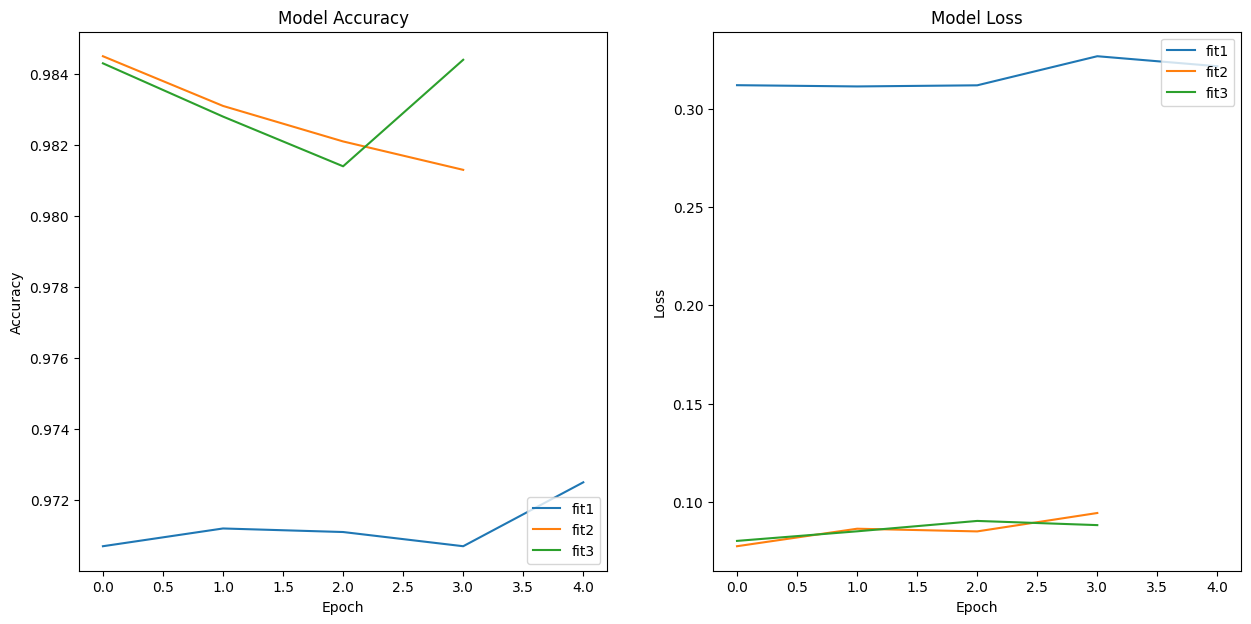

In [39]:
# summarize history for accuracy
plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)    
plt.plot(fit1.history['val_accuracy'])
plt.plot(fit2.history['val_accuracy'])
plt.plot(fit3.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['fit1', 'fit2', 'fit3'], loc='lower right')

plt.subplot(1,2,2)    
# summarize history for loss
plt.plot(fit1.history['val_loss'])
plt.plot(fit2.history['val_loss'])
plt.plot(fit3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['fit1', 'fit2', 'fit3'], loc='upper right')
plt.show()